In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tools import kaczmarz_method, sparse
from plot_tools import plot_residuals, plot_errors

import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title : Matplotlib configuration

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

SMALL_SIZE = 10 
MEDIUM_SIZE = 12 
BIGGER_SIZE = 14 

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['text.usetex'] = True

  # activate latex text rendering
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')

plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [3]:
# Fixing random state for reproducibility
np.random.seed(1234)

In [4]:
# Create the toy example

# Run this notebook to produce different plots in the paper:
#     (m, n) = (200, 600),  lambda=0.01 for figure 6
#     (m, n) = (200, 600), lambda=3 for figure 7
#     (m, n) = (100, 10), lambda=0.01 for figure 8
#     (m, n) = (100, 10), lambda=3 for figure 9

m = 200 # number of equation
n = 600 # number of unknown

In [5]:
s = 10  # number of nonzeros in solution

lambda_rsk = 0.01

A = np.random.randn(m,n) 
x_true = sparse(np.random.randn(n,1),s)

noiselev = 0.0

b = A @ x_true

noise = np.random.randn(m,1)
noise = noise/np.linalg.norm(noise)

b_noisy = b + noiselev*noise

print(A.shape, x_true.shape, b.shape, s)

(200, 600) (600, 1) (200, 1) 10


# Effect of $\eta$ on the convergence

In [6]:
eta_list = [1, 5, 10, 15, 20] 

thread_results = dict()
for thread in eta_list:
    thread_results[thread] = dict()

iterations = 400

squared_row_norms = np.linalg.norm(A, axis=1) ** 2
Fnorm = squared_row_norms.sum()

_, max_A, _ = np.linalg.svd(A, full_matrices=True)

smax = max_A[0]**2/Fnorm
smin = max_A[-1]**2/Fnorm
eta_opt = int(np.ceil(1/smax))

for thread in eta_list:
    
    alpha_rska1 = thread/(1 + (thread-1)*smax) # see Corollary 4.9 in the paper
    print(f' alpha = {alpha_rska1}, eta = {thread}, eta_opt = {np.ceil(1/smax)}')

    W_rska = [alpha_rska1 for _ in range(m)]

    Result = kaczmarz_method(A, b, thread,  x_true, W_rska, iterations, bN=b_noisy, lbda=0.01)

    thread_results[thread]['residuals'] = Result[1]
    thread_results[thread]['errors'] = Result[2]

 alpha = 1.0, eta = 1, eta_opt = 82.0
 alpha = 4.7651357404739425, eta = 5, eta_opt = 82.0
 alpha = 9.001725577871966, eta = 10, eta_opt = 82.0
 alpha = 12.793087687977449, eta = 15, eta_opt = 82.0
 alpha = 16.20590249484357, eta = 20, eta_opt = 82.0


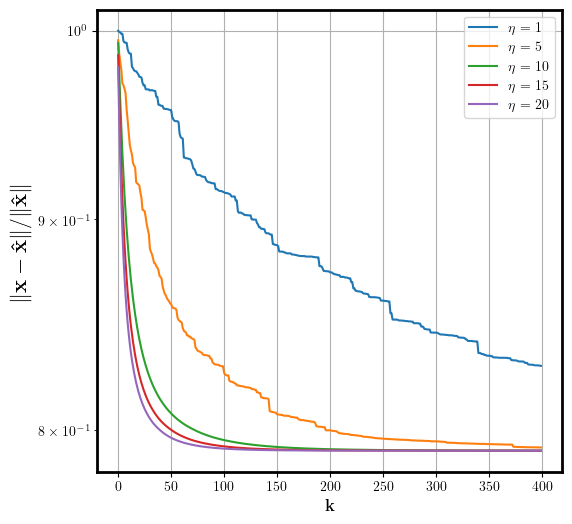

In [7]:
plot_errors(thread_results, r'$\eta$')

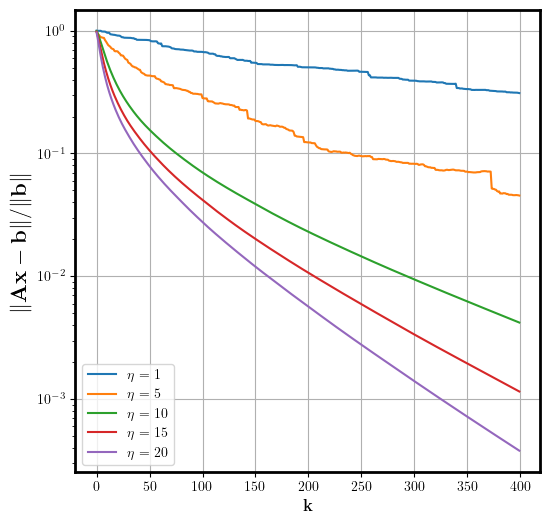

In [8]:
plot_residuals(thread_results, r'$\eta$')